# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [27]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


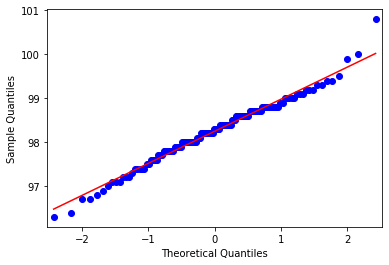

In [28]:
from statsmodels.graphics.gofplots import qqplot

qqplot(df['temperature'],line='s')
plt.show()

In [29]:
from scipy.stats import shapiro

stat, p = shapiro(df['temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.233
Sample looks Gaussian (fail to reject H0)


In [30]:
from scipy.stats import normaltest

stat, p = normaltest(df['temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')


Statistics=2.704, p=0.259
Sample looks Gaussian (fail to reject H0)


In [31]:
## 2. 

## There is a sufficiently large sample size 
t = len(df['gender'])
m = len(df['gender'].loc[df['gender']== "M"])
f = t - m

print(t,m,f)

## Since there are more than 30 in total sample size and, for the categorical data, there are more than 10 
## positives and 10 negatives, we can state the sample size is sufficiently large.

## 130 people definitely represent less than 10% of the population in this case, thus we can assume independence. 


130 65 65


In [32]:
## 3. 

sample_mean = df['temperature'].mean()
h0_mean = 98.6

df['shifted temperature'] = df['temperature'] - sample_mean + h0_mean 


In [33]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [34]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [65]:
import numpy as np

bs_mean = draw_bs_reps(df['shifted temperature'],np.mean,100000)

In [71]:
p_val = float(np.sum(bs_mean < sample_mean) + np.sum(bs_mean > h0_mean + (h0_mean - sample_mean)))/float(len(bs_mean))
print(p_val)

0.0


In [81]:
## Frequentist Statistical Testing

## We will use a one-sample test, since we are not testing whether two samples differ significantly, but rather
## the entire sample offers any significant evident that the true population mean isn't 98.6. It is appropriate to 
## use the z-test here due to the fact that we have a sample size of > 30 and normally distributed. 

## For curiosity, I'm calculating the p-value using two methods. 

import scipy.stats as stats

n = len(df['temperature'])
sample_std = np.std( df['temperature'])
stat = (sample_mean - h0_mean)/(sample_std/(n**0.5))
p_val = stats.t.sf(np.abs(stat), n-1)*2
print("using a t-test, p-value is ", p_val)

p_val = stats.norm.sf(np.abs(stat))*2
print("using a z-test, p-value is " , p_val)



using a t-test, p-value is  2.1887464624095175e-07
using a z-test, p-value is  4.3523151658821886e-08


In [79]:
from scipy.stats import ttest_1samp
from statsmodels.stats import weightstats as stests

tset, pval = ttest_1samp(df['temperature'], h0_mean)
print(pval)

ztest ,pval = stests.ztest(df['temperature'], x2=None, value=h0_mean)
print(float(pval))

2.4106320415561276e-07
4.9021570141012155e-08


In [82]:
## The results are two predicted. The t-test tended to overpredict the tails. Both tests show that the probability
## of getting a result at least as extreme as the one provided in the sample if the null hypothesis were true is
## negligible. Thus, we can reject the null hypothesis and state that the population mean is not 98.6. 

## Now to repeat the hypothesis testing with a sample size of 10

new_sample = np.random.choice(df['temperature'],10)

tset, pval = ttest_1samp(new_sample, h0_mean)
print(pval)

ztest ,pval = stests.ztest(new_sample, x2=None, value=h0_mean)
print(float(pval))

n = len(new_sample)
sample_std = np.std(new_sample)
stat = (sample_mean - h0_mean)/(sample_std/(n**0.5))
p_val = stats.t.sf(np.abs(stat), n-1)*2
print("using a t-test, p-value is ", p_val)

p_val = stats.norm.sf(np.abs(stat))*2
print("using a z-test, p-value is " , p_val)


## In this case, the t-test is more suitable since we do not have a large sample size, and a z test would underestimate 
## The uncertainty in our distribution.

0.04345744059622785
0.018881814172881796
using a t-test, p-value is  0.02070129586378505
using a z-test, p-value is  0.005104956725501526


In [91]:
## 4. 

## bootstrap: 

bs_mean = draw_bs_reps(df['temperature'],np.mean,100000)
a = np.percentile(bs_mean,[2.5,97.5])
margin_of_error = (a[1] - a[0])/2 
print(np.percentile(bs_mean,[2.5,97.5]))
print(margin_of_error)

## frequentist. 

z_score = stats.norm.ppf(.975)
ci = [sample_mean - z_score*sample_std/(n**0.5) , sample_mean + z_score*sample_std/(n**0.5) ]
print(ci)
print(z_score*sample_std/(n**0.5))

## We have a 95% confidence interval that the the true mean will be 

[98.12382692 98.37307692]
0.12462500000000887
[98.00372620940206, 98.4947353290595]
0.24550455982871494


In [97]:
## 5. 

## bootstrap, since it is a robust method that does not assume a normal distribution. 

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty((size))

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates


def diff_of_means(data1,data2):
    return np.abs(np.mean(data1) - np.mean(data2))


temperature_male = df['temperature'].loc[df['gender']=='M']
temperature_female = df['temperature'].loc[df['gender']=='F']


# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(temperature_male, temperature_female,
                                 diff_of_means, size=10000)



diff_means = np.abs(temperature_male.mean() - temperature_female.mean())

# Compute p-value: p
p = np.sum(perm_replicates >= diff_means) / len(perm_replicates)

## since p-value less than 0.05, we can state that we cannot reject the null hypothesis that each genders have 
## different mean temperatures. 